在原本代码 `Neural Networks writing number.ipynb` 的基础上加入数据增强（对图像的平移操作）和卷积层，汇聚层. 对于自己绘制的手写数据已经能由很好的识别效果.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 20  # 固定字体大小
plt.rcParams['font.sans-serif']=['SimSun'] # 用来正常显示中文标签，使用宋体
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
mnist = keras.datasets.mnist  # 载入
(train, train_y), (test, test_y) = mnist.load_data()  # 分解为训练数据和测试数据
train, test = train / 255, test / 255

In [9]:
shape = (2, 28, 28, 3)
x = np.arange(np.prod(shape)).reshape(shape)
y = layers.Cropping2D(cropping=((2, 2)))(x)
print(y.shape)

(2, 24, 24, 3)


In [30]:
plt.rcParams['axes.linewidth'] = 1  # 图框宽度
plt.rcParams['figure.dpi'] = 100  # plt.show显示分辨率
config = {
    "font.family":'serif',
    "font.size": 18,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
plt.rcParams.update(config)

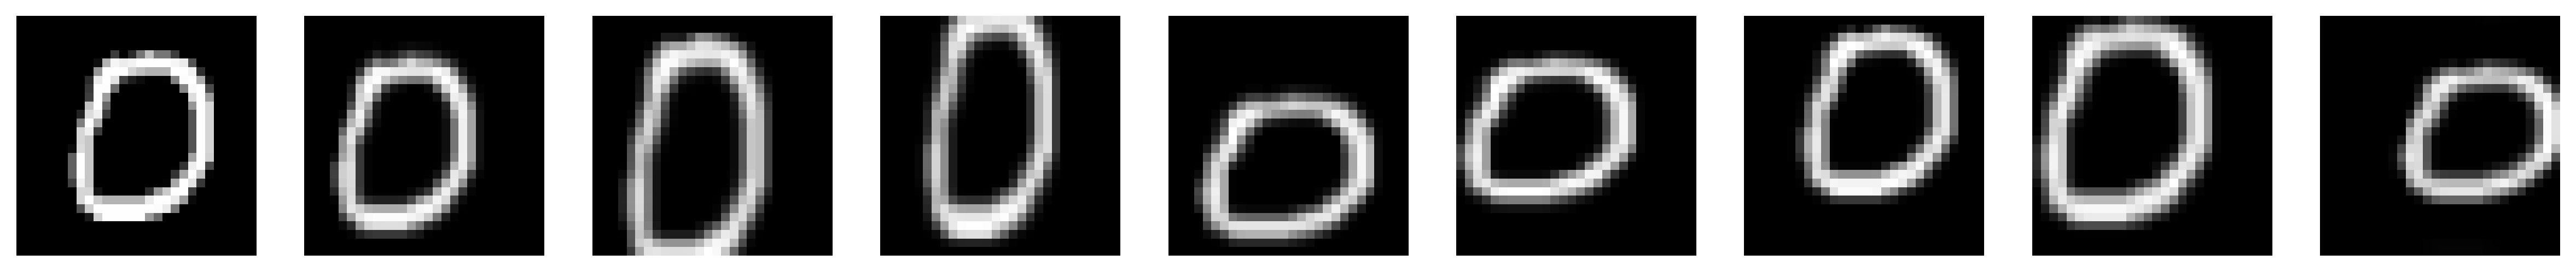

In [20]:
# 对数据增强的详细解释请见 Part3 Convolution Neural Networks 目录下 Image classification.ipynb 的数据增强部分
augmentation = keras.Sequential([
    layers.RandomZoom(0.3, 0.3, input_shape=(28, 28, 1)),  # 压缩图像
    layers.RandomTranslation(0.15, 0.15, fill_mode='constant', input_shape=(28, 28, 1))  # 平移图像
])
idx = 10
plt.figure(figsize=(20, 20))
plt.subplot(1, 9, 1)
plt.imshow(test[idx], cmap='gray')
plt.axis('off')
for i in range(8):
    plt.subplot(1, 9, i + 2)
    tmp = augmentation(np.array([test[idx]]))
    plt.imshow(tmp[0], cmap='gray')
    plt.axis('off')
    #plt.title(str(tmp[0].shape))
plt.savefig('augmentation.png', bbox_inches = 'tight')
plt.savefig('augmentation.pdf', bbox_inches = 'tight')
plt.show()

In [14]:
model = keras.Sequential([
    augmentation,  # augmentation
    layers.Conv2D(64, (3, 3), activation='relu'),  # converlution
    layers.MaxPool2D(),  # Pooling
    layers.Flatten(),   # input layer
    layers.Dense(128, activation='relu'),    # hidden layer
    layers.Dense(10, activation='softmax')  # output layer
])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_8 (Sequential)    (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1384576   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
____________________________________________

In [15]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',  # 交叉熵
             metrics=['accuracy'])  # 准确率作为判断指标
model.fit(train, train_y, epochs=10, validation_data=(test, test_y))

Epoch 1/10
1875/1875 [==============================] - 13s 5ms/step - loss: 0.4428 - accuracy: 0.8608 - val_loss: 0.1275 - val_accuracy: 0.9568
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1902 - accuracy: 0.9416 - val_loss: 0.0759 - val_accuracy: 0.9737
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1476 - accuracy: 0.9541 - val_loss: 0.0841 - val_accuracy: 0.9730
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1271 - accuracy: 0.9600 - val_loss: 0.0706 - val_accuracy: 0.9789
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1114 - accuracy: 0.9657 - val_loss: 0.0738 - val_accuracy: 0.9753
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1022 - accuracy: 0.9684 - val_loss: 0.0784 - val_accuracy: 0.9771
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0942 - accuracy: 0.9708 - val_loss: 0.0562 - val_accuracy

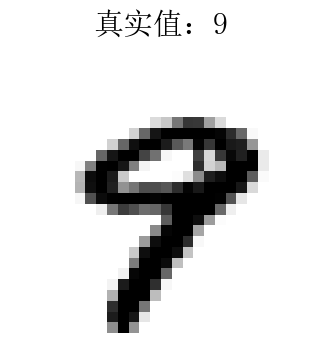

In [32]:
def check(n):
    predict = np.argmax(model.predict(test)[n])  # 返回预测值
    plt.imshow(test[n], cmap=plt.cm.binary)
    plt.title('真实值：' + str(test_y[n]))
    plt.xlabel('预测值：' + str(predict))
    plt.axis('off')
    plt.show()
check(9)

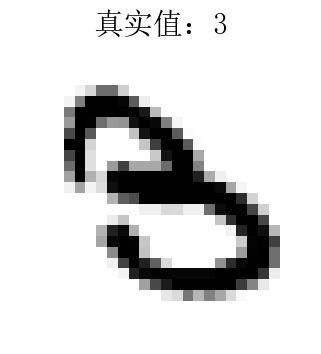

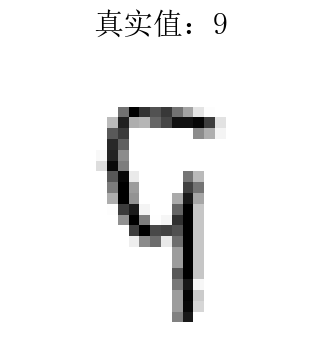

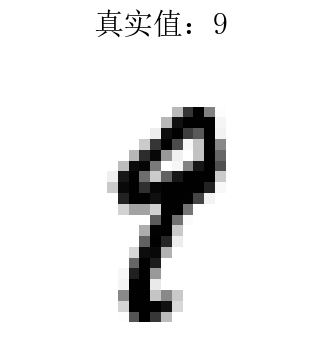

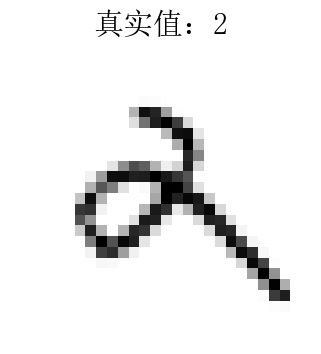

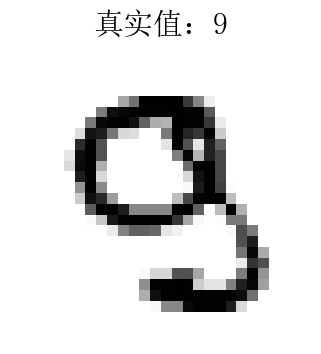

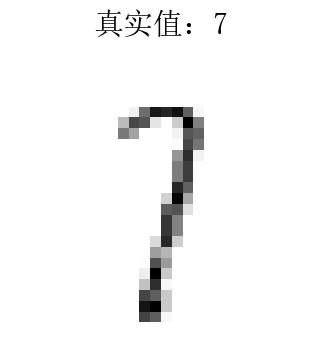

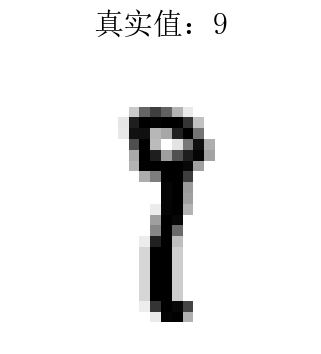

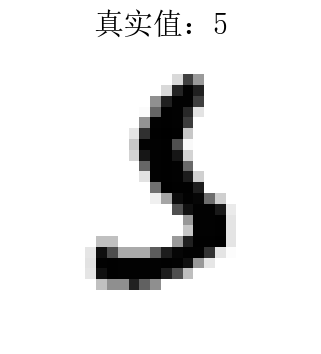

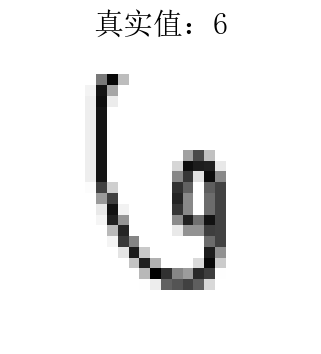

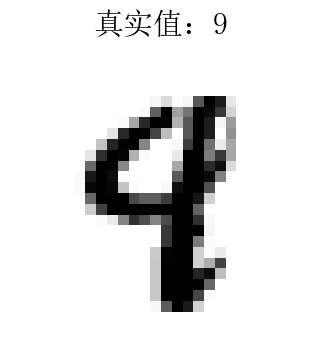

In [33]:
# 输出前10个错误预测结果
cnt = 10
result = model.predict(test)
for i in range(test.shape[0]):
    predict = np.argmax(result[i])
    if predict != test_y[i]:
        check(i)
        cnt -= 1
    if cnt == 0:
        break

### 自定义测试样本
可以通过画图工具修改目录下的 `test.png` 文件，用于自定义预测数据，看看能否识别自己写的数字！

In [68]:
plt.rcParams['axes.linewidth'] = 1  # 图框宽度
config = {
    "figure.dpi": 100,
    "font.family":'serif',
    "font.size": 16,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
plt.rcParams.update(config)

[3.4502454e-04 3.2940072e-05 9.9998978e+01 4.2790052e-07 2.1586554e-04
 2.2528490e-10 8.8088248e-09 6.6987806e-05 3.6854265e-04 7.9097155e-09]


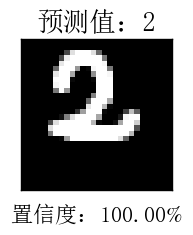

In [82]:
from PIL import Image  # 用于转换图像
def my_test():
    image = Image.open('test.png')
    image = image.convert('L')
    mytest = np.array(image)
    mytest = (255 - mytest) / 255
    mytest = mytest.reshape(1, 28, 28, 1)
    predict = model.predict(mytest)[0]
    score = predict / np.sum(predict) * 100
    print(score)
    plt.figure(figsize=(2, 2))
    plt.imshow(mytest[0], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title('预测值：{}'.format(np.argmax(predict)))
    plt.xlabel('置信度：{:.2f}$\%$'.format(np.max(score)))
    plt.savefig('mytest5.pdf', bbox_inches = 'tight')
    plt.show()

my_test()